<a href="https://colab.research.google.com/github/Sricharangoud/generative-AI/blob/main/Gen_Ai_7_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Assignment_7.1**

Epoch 1/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 192ms/step - accuracy: 0.3253 - loss: 0.7499 - val_accuracy: 0.3442 - val_loss: 0.7529
Epoch 2/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.3284 - loss: 0.7541 - val_accuracy: 0.3442 - val_loss: 0.7528
Epoch 3/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.3405 - loss: 0.7500 - val_accuracy: 0.3442 - val_loss: 0.7527
Epoch 4/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.3093 - loss: 0.7610 - val_accuracy: 0.3442 - val_loss: 0.7526
Epoch 5/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.3104 - loss: 0.7506 - val_accuracy: 0.3442 - val_loss: 0.7526
Epoch 6/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3279 - loss: 0.7491 - val_accuracy: 0.3442 - val_loss: 0.7525
Epoch 7/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.3118 - loss: 0.7481 - val_accuracy: 0.3442 - val_loss: 0.7524
Epoch 8/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2903 - loss: 0.7546 - val_accuracy: 0

Training Accuracy: 0.34201955795288086, Testing Accuracy: 0.350649356842041
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
              precision    recall  f1-score   support

           0       0.48      0.13      0.21        99
           1       0.32      0.75      0.45        55

    accuracy                           0.35       154
   macro avg       0.40      0.44      0.33       154
weighted avg       0.42      0.35      0.29       154



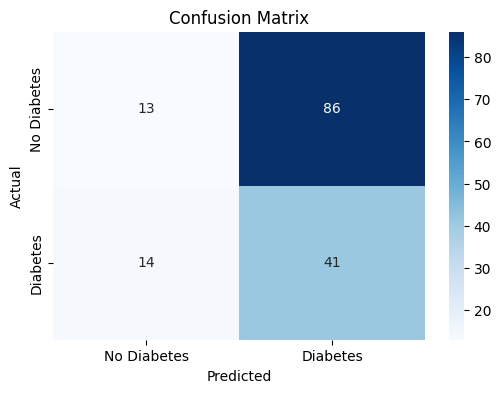

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
df = pd.read_csv(url, header=None)
df.columns = ['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
              'bmi', 'diabetespedigree', 'age', 'outcome']

target_column = 'outcome'
X = df.drop(columns=[target_column])
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(16, activation='relu'),
    Dense(20, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=keras.optimizers.Adadelta(), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=150, batch_size=64, validation_data=(X_test, y_test))

train_acc = model.evaluate(X_train, y_train, verbose=0)[1]
test_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print(f'Training Accuracy: {train_acc}, Testing Accuracy: {test_acc}')

model.save('diabetes_model.h5')

y_pred = (model.predict(X_test) > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

def predict_diabetes(features):
    loaded_model = keras.models.load_model('diabetes_model.h5')
    features = scaler.transform([features])
    return (loaded_model.predict(features)[0][0] > 0.5).astype(int)